In [ ]:
# Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and
#   Environmental Variability within a Community of Antarctic Penguins
#   (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

# https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

# https://github.com/allisonhorst/palmerpenguins/blob/main/README.md

In [85]:
import pandas as pd
import numpy as np


In [86]:
df = pd.read_csv('penguins_size.csv')
pengSize.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0.0
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,1.0
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,0.0
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [87]:
df.shape

(344, 7)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [89]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [90]:
df['sex'] = pengSize['sex'].replace({'MALE' : 0, 'FEMALE' : 1})

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    float64
dtypes: float64(5), object(2)
memory usage: 18.9+ KB


In [92]:
mean1 = df['culmen_length_mm'].mean()
mean2 = df['culmen_depth_mm'].mean()
mean3 = df['flipper_length_mm'].mean()
mean4 = df['body_mass_g'].mean()
mean5 = df['sex'].mode()[0]
df['culmen_length_mm'].fillna(mean2,inplace = True)
df['culmen_depth_mm'].fillna(mean3,inplace = True)
df['flipper_length_mm'].fillna(mean4,inplace = True)
df['body_mass_g'].fillna(mean5,inplace = True)
df['sex'].fillna(mean5,inplace = True)

In [93]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    float64
dtypes: float64(5), object(2)
memory usage: 18.9+ KB


In [95]:
df['island'] = df['island'].map({'Torgersen' : 0, 'Biscoe' : 1,  'Dream' : 2})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    int64  
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 18.9+ KB


In [96]:
df['island'].value_counts()

1    168
2    124
0     52
Name: island, dtype: int64

In [100]:
target = df['species']
df.drop(columns = 'species' , inplace = True)
feature = df

In [101]:
feature

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.10000,18.700000,181.000000,3750.0,0.0
1,0,39.50000,17.400000,186.000000,3800.0,1.0
2,0,40.30000,18.000000,195.000000,3250.0,1.0
3,0,17.15117,200.915205,4201.754386,0.0,0.0
4,0,36.70000,19.300000,193.000000,3450.0,1.0
...,...,...,...,...,...,...
339,1,17.15117,200.915205,4201.754386,0.0,0.0
340,1,46.80000,14.300000,215.000000,4850.0,1.0
341,1,50.40000,15.700000,222.000000,5750.0,0.0
342,1,45.20000,14.800000,212.000000,5200.0,1.0


In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    feature,target, test_size=0.25, random_state=150
)

In [106]:
y_test.count()

86

In [107]:
from sklearn import tree

treeClass = tree.DecisionTreeClassifier()
treeClass.fit(X_train, y_train)

DecisionTreeClassifier()

In [108]:
estim = treeClass.predict([X_test.values[6]])
print('Yang asli :',y_test.values[6])
print('Yang pred :',estim[0])

Yang asli : Gentoo
Yang pred : Gentoo


C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [109]:
from sklearn.metrics import accuracy_score
y_pred = treeClass.predict(X_test)
accuray = accuracy_score(y_pred, y_test)
print(accuray)

0.9534883720930233


[Text(0.5735294117647058, 0.9166666666666666, 'x[3] <= 206.5\ngini = 0.636\nsamples = 258\nvalue = [115, 52, 91]'),
 Text(0.3235294117647059, 0.75, 'x[1] <= 43.35\ngini = 0.429\nsamples = 163\nvalue = [113, 49, 1]'),
 Text(0.17647058823529413, 0.5833333333333334, 'x[2] <= 16.8\ngini = 0.052\nsamples = 113\nvalue = [110, 3, 0]'),
 Text(0.11764705882352941, 0.4166666666666667, 'x[1] <= 40.2\ngini = 0.355\nsamples = 13\nvalue = [10, 3, 0]'),
 Text(0.058823529411764705, 0.25, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]'),
 Text(0.17647058823529413, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.23529411764705882, 0.4166666666666667, 'gini = 0.0\nsamples = 100\nvalue = [100, 0, 0]'),
 Text(0.47058823529411764, 0.5833333333333334, 'x[0] <= 1.5\ngini = 0.15\nsamples = 50\nvalue = [3, 46, 1]'),
 Text(0.35294117647058826, 0.4166666666666667, 'x[5] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.29411764705882354, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'

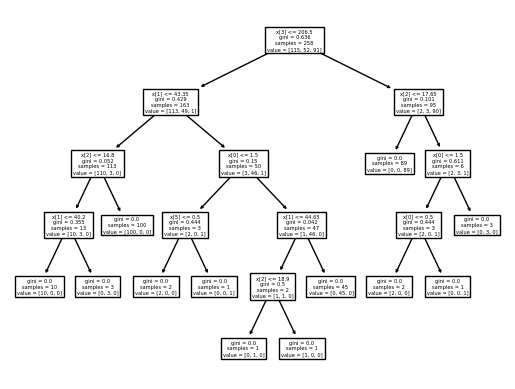

In [110]:
tree.plot_tree(treeClass)

In [112]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=11)


In [113]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [115]:
estim2 = KNN.predict([X_test.values[10]])
print('Yang asli :',y_test.values[10])
print('Yang pred :',estim2[0])

Yang asli : Gentoo
Yang pred : Gentoo


C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [117]:
y_pred2 = KNN.predict(X_test)
accuray2 = accuracy_score(y_pred2, y_test)
print(accuray2)

0.7209302325581395


In [118]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [119]:
gnb.fit(X_train,y_train)

GaussianNB()

In [120]:
estim3 = gnb.predict([X_test.values[11]])
print('Yang asli :',y_test.values[11])
print('Yang pred :',estim3[0])

Yang asli : Adelie
Yang pred : Gentoo


C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [121]:
y_pred3 = gnb.predict(X_test)
accuracy3 = accuracy_score(y_pred3, y_test)
print(accuracy3)

0.7325581395348837


In [122]:
from sklearn.metrics import confusion_matrix

tree_matrix = confusion_matrix(y_test, y_pred)
knn_matrix = confusion_matrix(y_test, y_pred2)
gnb_matrix = confusion_matrix(y_test, y_pred3)
print(tree_matrix)
print(knn_matrix)
print(gnb_matrix)

[[35  2  0]
 [ 2 14  0]
 [ 0  0 33]]
[[34  1  2]
 [13  2  1]
 [ 7  0 26]]
[[14 18  5]
 [ 0 16  0]
 [ 0  0 33]]


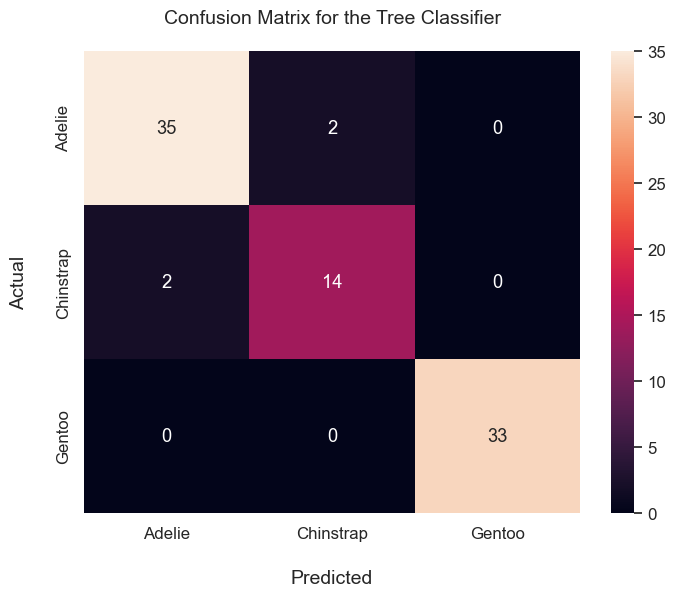

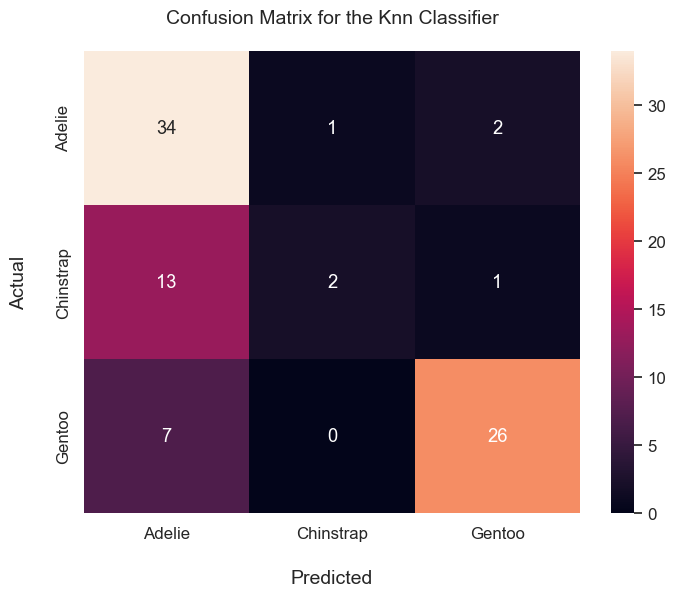

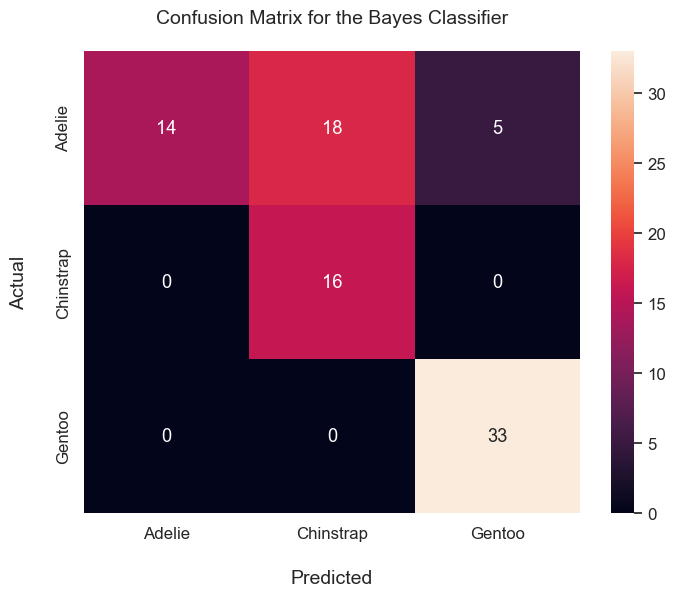

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)

axTree = sns.heatmap(tree_matrix, annot=True, fmt='d', )
axTree.set_xlabel("Predicted", fontsize=14, labelpad=20)
axTree.xaxis.set_ticklabels(['Adelie', 'Chinstrap', 'Gentoo'])
axTree.set_ylabel("Actual", fontsize=14, labelpad=20)
axTree.yaxis.set_ticklabels(['Adelie', 'Chinstrap', 'Gentoo'])
axTree.set_title("Confusion Matrix for the Tree Classifier", fontsize=14, pad=20)

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)

axKnn = sns.heatmap(knn_matrix, annot=True, fmt='d', )
axKnn.set_xlabel("Predicted", fontsize=14, labelpad=20)
axKnn.xaxis.set_ticklabels(['Adelie', 'Chinstrap', 'Gentoo'])
axKnn.set_ylabel("Actual", fontsize=14, labelpad=20)
axKnn.yaxis.set_ticklabels(['Adelie', 'Chinstrap', 'Gentoo'])
axKnn.set_title("Confusion Matrix for the Knn Classifier", fontsize=14, pad=20)

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)

axGnb = sns.heatmap(gnb_matrix, annot=True, fmt='d', )
axGnb.set_xlabel("Predicted", fontsize=14, labelpad=20)
axGnb.xaxis.set_ticklabels(['Adelie', 'Chinstrap', 'Gentoo'])
axGnb.set_ylabel("Actual", fontsize=14, labelpad=20)
axGnb.yaxis.set_ticklabels(['Adelie', 'Chinstrap', 'Gentoo'])
axGnb.set_title("Confusion Matrix for the Bayes Classifier", fontsize=14, pad=20)

plt.show()